# Exploratory Data Analysis Of Haberman's Survival Dataset


In [ ]:
##Our objective is to find whether a person can survive cancer or not

In [6]:
##import neccessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.9.0


In [8]:
##load the dataset into a pandas dataframe
df=pd.read_csv('D:\Applied AI Course\datasets\haberman.csv',header=None)
df.columns=["Age","Year","Positive_Aux_Nodes","Survival_status"]
df.head()

,Age,Year,Positive_Aux_Nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
##number of datapoints and features
print(df.shape)

(306, 4)


In [10]:
#number of cloumns
print(df.columns)

Index(['Age', 'Year', 'Positive_Aux_Nodes', 'Survival_status'], dtype='object')


In [11]:
df["Survival_status"].value_counts()  #to check for balanced or imbalanced data

1    225
2     81
Name: Survival_status, dtype: int64

No handles with labels found to put in legend.


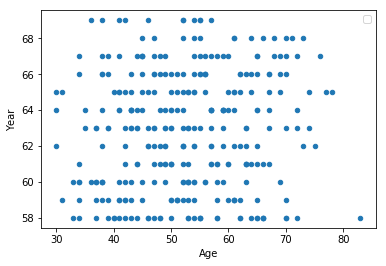

In [12]:
##generate a 2d scatterplot
df.plot(kind="scatter",x="Age",y="Year");
plt.legend()
plt.show()


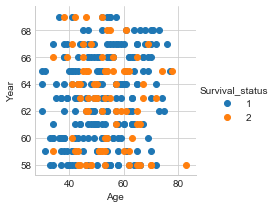

In [13]:
#scatterplot with color-coding using seaborn
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_status",size=3) \
   .map(plt.scatter,"Age","Year") \
    .add_legend();
plt.show()

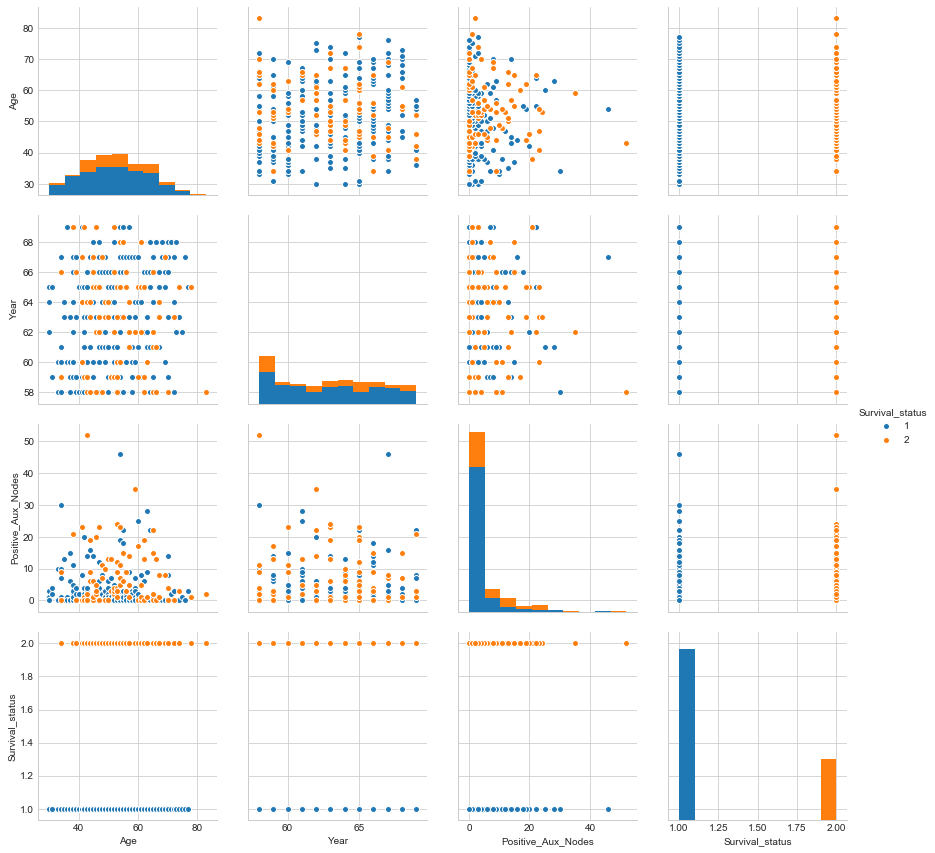

In [14]:
##pair plots

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="Survival_status",size=3);
plt.show()

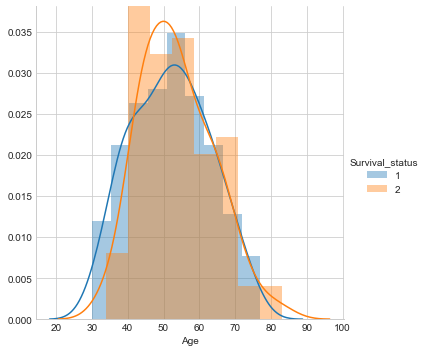

In [14]:
##Histogram plot
sns.FacetGrid(df,hue="Survival_status", size=5) \
    .map(sns.distplot,"Age") \
    .add_legend();

plt.show()

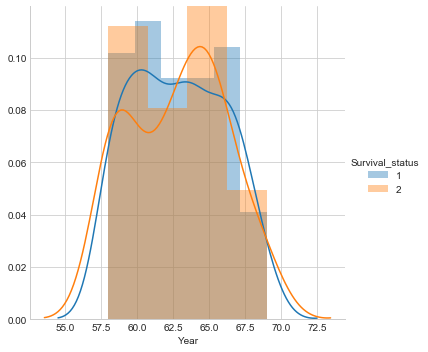

In [15]:
sns.FacetGrid(df,hue="Survival_status", size=5) \
    .map(sns.distplot,"Year") \
    .add_legend();

plt.show()

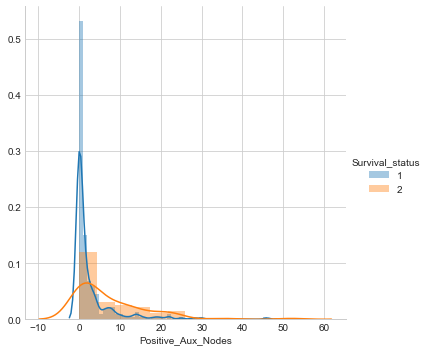

In [16]:
sns.FacetGrid(df,hue="Survival_status", size=5) \
    .map(sns.distplot,"Positive_Aux_Nodes") \
    .add_legend();

plt.show()

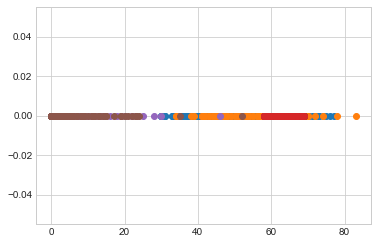

In [17]:
#to find the PDF and CDF
df
Survived=df.loc[df["Survival_status"]== 1]
Not_survive=df.loc[df["Survival_status"] == 2]
plt.plot(Survived["Age"], np.zeros_like(Survived['Age']), 'o')
plt.plot(Not_survive["Age"], np.zeros_like(Not_survive['Age']), 'o')
plt.plot(Survived["Year"], np.zeros_like(Survived['Year']), 'o')
plt.plot(Not_survive["Year"], np.zeros_like(Not_survive['Year']), 'o')
plt.plot(Survived["Positive_Aux_Nodes"], np.zeros_like(Survived['Positive_Aux_Nodes']), 'o')
plt.plot(Not_survive["Positive_Aux_Nodes"], np.zeros_like(Not_survive['Positive_Aux_Nodes']), 'o')
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


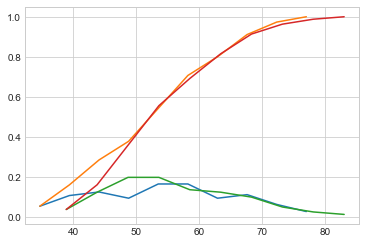

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


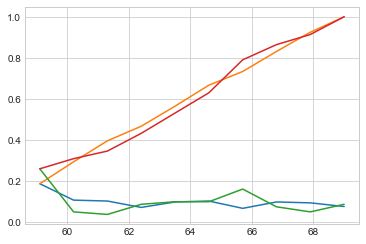

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


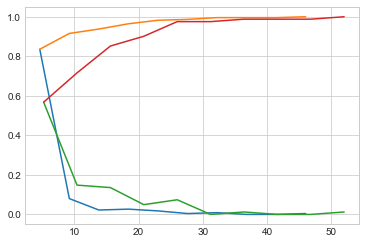

In [18]:
#Finding the pdf and cdf

counts, bin_edges = np.histogram(Survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(Not_survive['Age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()

counts, bin_edges = np.histogram(Survived['Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(Not_survive['Year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()


counts, bin_edges = np.histogram(Survived['Positive_Aux_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


counts, bin_edges = np.histogram(Not_survive['Positive_Aux_Nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()

# Observation
Looking at the above figure we can see the pdf of both Survived and Not_Survived class labels converge are 0.9 on y-axis.
For the feature being Year we can find slight deviation in the plot

In [19]:
#Find the mean of Age,Year
print("Mean:")
print(np.mean(Survived["Age"]))
print(np.mean(Not_survive["Age"]))
print(np.mean(Survived["Year"]))
print(np.mean(Not_survive["Year"]))
print(np.mean(Survived["Positive_Aux_Nodes"]))
print(np.mean(Not_survive["Positive_Aux_Nodes"]))

print("\nStd-dev:");
print(np.std(Survived["Age"]))
print(np.std(Not_survive["Age"]))
print(np.std(Survived["Year"]))
print(np.std(Not_survive["Year"]))
print(np.std(Survived["Positive_Aux_Nodes"]))
print(np.std(Not_survive["Positive_Aux_Nodes"]))

Mean:
52.01777777777778
53.67901234567901
62.86222222222222
62.82716049382716
2.7911111111111113
7.45679012345679

Std-dev:
10.987655475100508
10.104182193031312
3.2157452144021947
3.3214236255207887
5.857258449412138
9.128776076761635


In [20]:
#Median and Quantiles
print("Medians:")
print(np.median(Survived["Age"]))
print(np.median(Not_survive["Age"]))
print(np.median(Survived["Year"]))
print(np.median(Not_survive["Year"]))
print(np.median(Survived["Positive_Aux_Nodes"]))
print(np.median(Not_survive["Positive_Aux_Nodes"]))
print("Quantiles:")
print(np.percentile(Survived["Age"],np.arange(0,100,25)))
print(np.percentile(Not_survive["Age"],np.arange(0,100,25)))
print(np.percentile(Survived["Year"],np.arange(0,100,25)))
print(np.percentile(Not_survive["Year"],np.arange(0,100,25)))
print(np.percentile(Survived["Positive_Aux_Nodes"],np.arange(0,100,25)))
print(np.percentile(Not_survive["Positive_Aux_Nodes"],np.arange(0,100,25)))

Medians:
52.0
53.0
63.0
63.0
0.0
4.0
Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [21]:
#90th percentile

print("\n90th Percentiles:")
print(np.percentile(Survived["Age"],90))
print(np.percentile(Survived["Year"],90))
print(np.percentile(Survived["Positive_Aux_Nodes"], 90))

print(np.percentile(Not_survive["Age"],90))
print(np.percentile(Not_survive["Year"],90))
print(np.percentile(Not_survive["Positive_Aux_Nodes"], 90))


90th Percentiles:
67.0
67.0
8.0
67.0
67.0
20.0


In [22]:
#Median absolute deviation

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Survived["Age"]))
print(robust.mad(Not_survive["Age"]))
print(robust.mad(Survived["Year"]))
print(robust.mad(Not_survive["Year"]))
print(robust.mad(Survived["Positive_Aux_Nodes"]))
print(robust.mad(Not_survive["Positive_Aux_Nodes"]))


Median Absolute Deviation
13.343419966550417
11.860817748044816
4.447806655516806
4.447806655516806
0.0
5.930408874022408


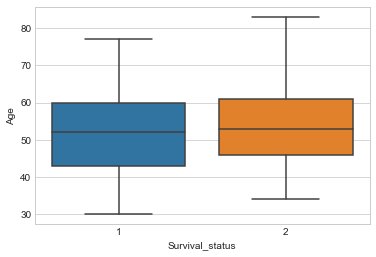


 -------Year--- 



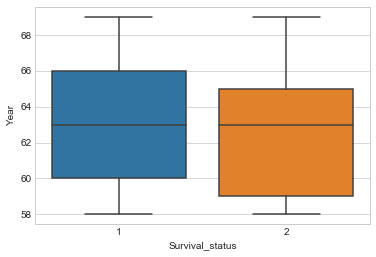


 -------Positive Auxiliary Nodes--- 



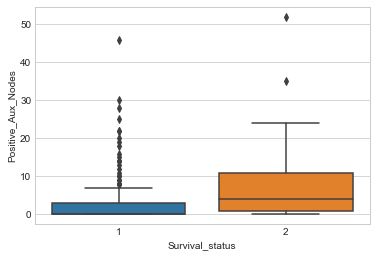

In [29]:
#Box plots
sns.boxplot(x='Survival_status',y='Age',data=df)
plt.show()

print("\n -------Year--- \n")
sns.boxplot(x='Survival_status',y='Year',data=df)
plt.show()

print("\n -------Positive Auxiliary Nodes--- \n")
sns.boxplot(x='Survival_status',y='Positive_Aux_Nodes',data=df)
plt.show()

## Observations
1. From the above box plots we can infer that for not surviving cancer patients the 75th percentile is between the year 64 to 66
and 25% of cancer patients non surviving occurs between year 58 and 63
2. The age of cancer patients who don't survive cancer 25% between 40 to 50 while 50% around 50 years of age while the 75% comes at around 60 years of age for surviving patients thugh 75% people survive who are aged 60.
3. 75% People in the year 1965 survived 

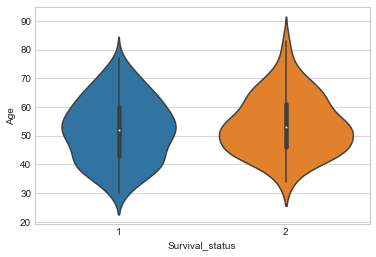

In [33]:
## Violin plot

sns.violinplot(x="Survival_status", y="Age", data=df, size=8)
plt.show()


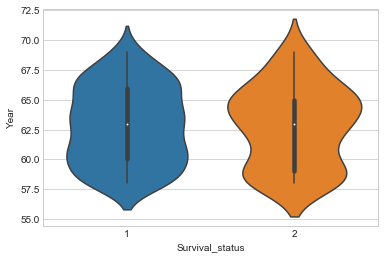

In [34]:
sns.violinplot(x="Survival_status", y="Year",data=df, size=8)
plt.show()

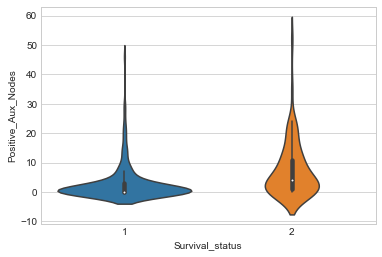

In [35]:
sns.violinplot(x="Survival_status", y="Positive_Aux_Nodes", data=df, size=8)
plt.show()

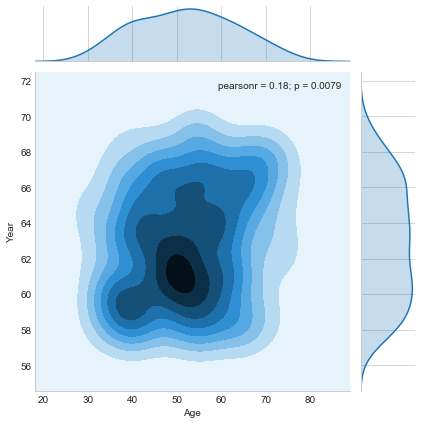

In [36]:
sns.jointplot(x="Age", y="Year", data=Survived, kind="kde");
plt.show();

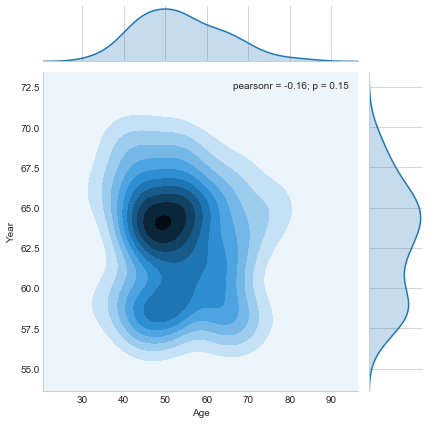

In [37]:
sns.jointplot(x="Age", y="Year", data=Not_survive, kind="kde");
plt.show();